In [23]:
# Changes to modules not reflected in this notebook without this
%load_ext autoreload
%autoreload

from etl import (
    delete_data_dir, 
    download_data,
    get_stock_data,
)

from calc import (
    get_target_tickers,
    visualise_dataframes
)

from financials import (
    get_all_earnings_info,
    show_earnings_info
)

from tickers import tickers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import time
from datetime import datetime
import pytz
from IPython.display import clear_output

from pandas import DataFrame

from playsound import playsound


In [66]:
delete_data_dir()
# tickers, len(tickers)

In [25]:
today = time.strftime("%Y-%m-%d")
data_dir = f'data/{today}'
period = '3mo'
interval = '1d'
ma_and_std_window = 20

multi_df = get_stock_data(tickers, period, interval, ma_and_std_window, today, data_dir)

Today's data not found in data dir. Getting new data.
[*********************100%%**********************]  60 of 60 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

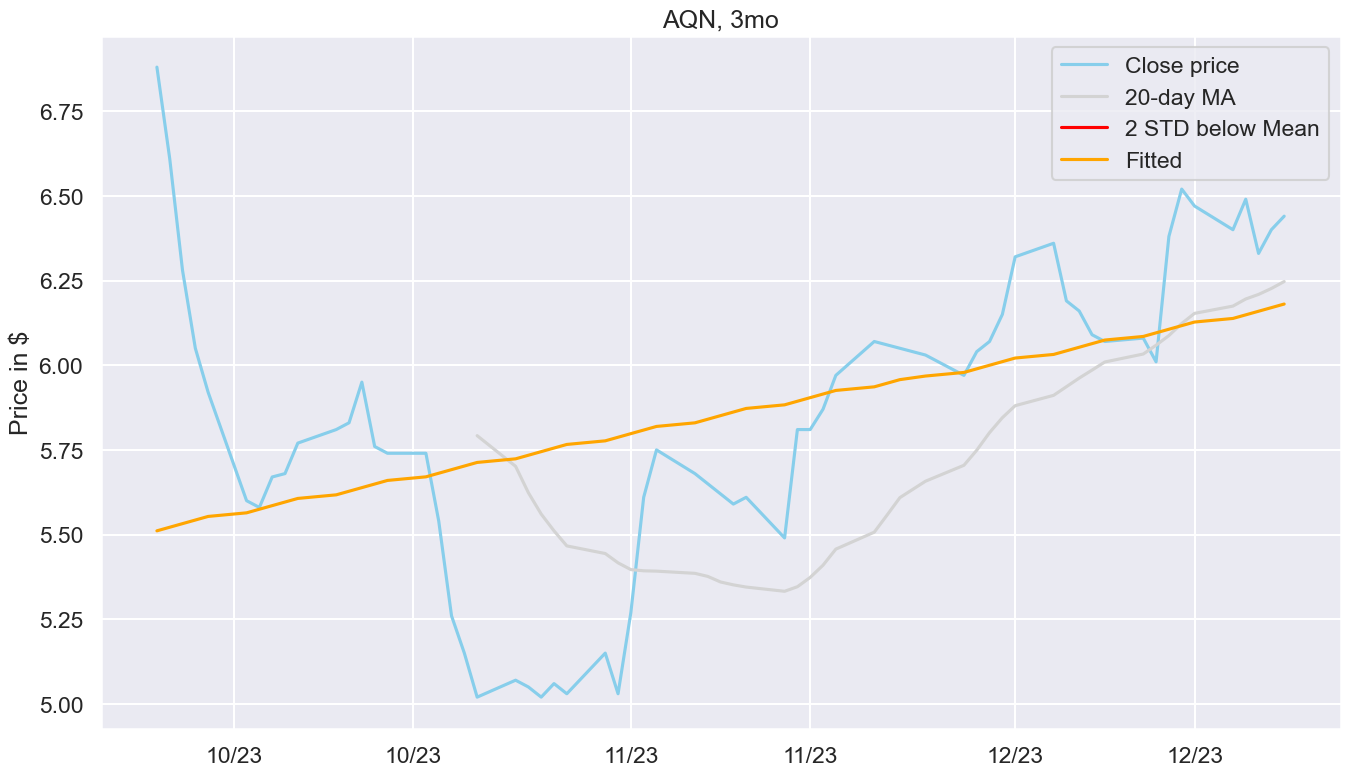

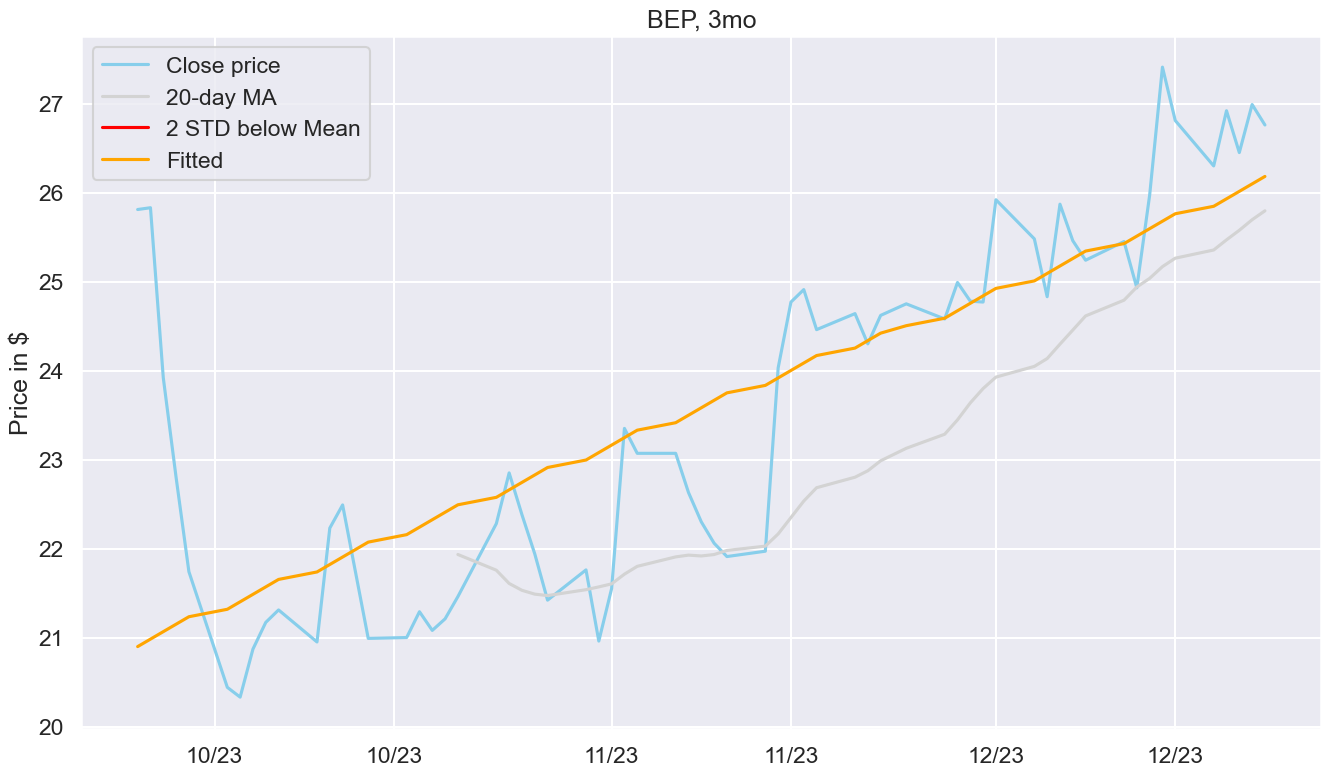

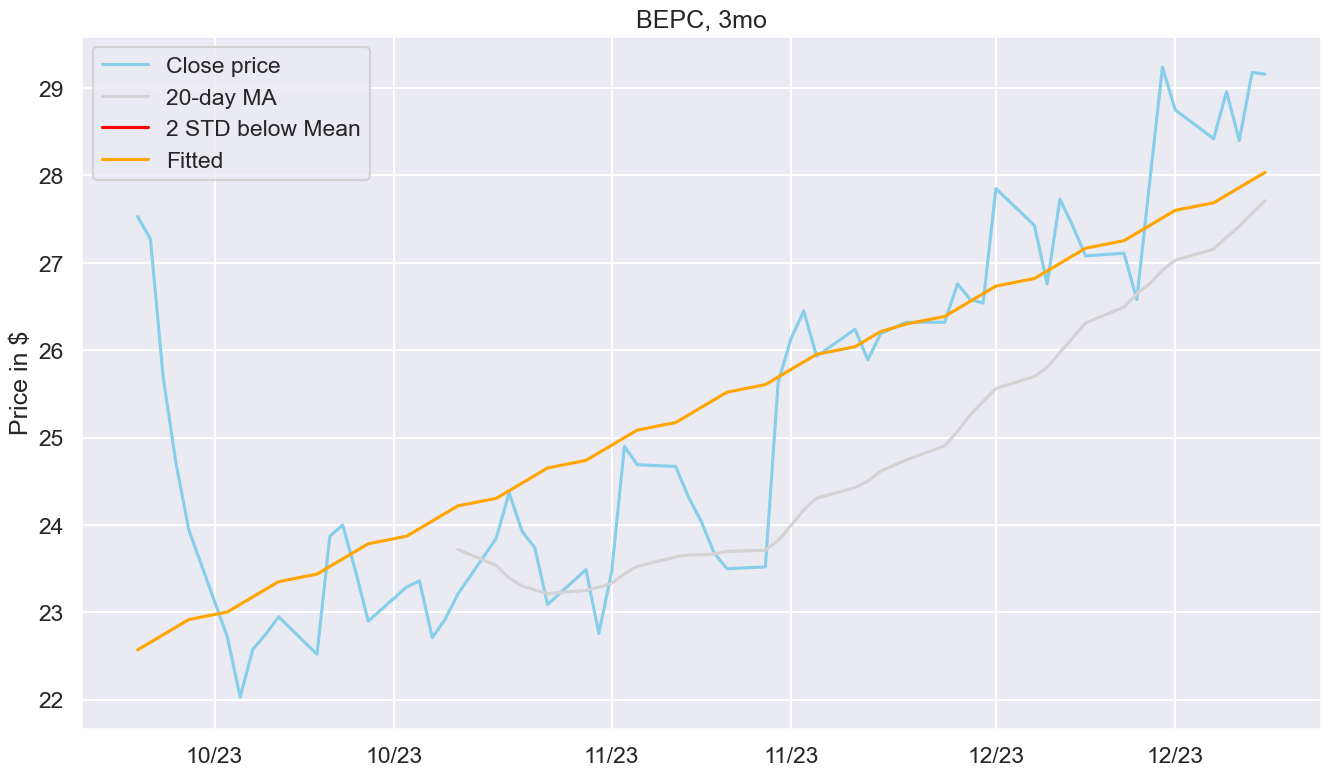

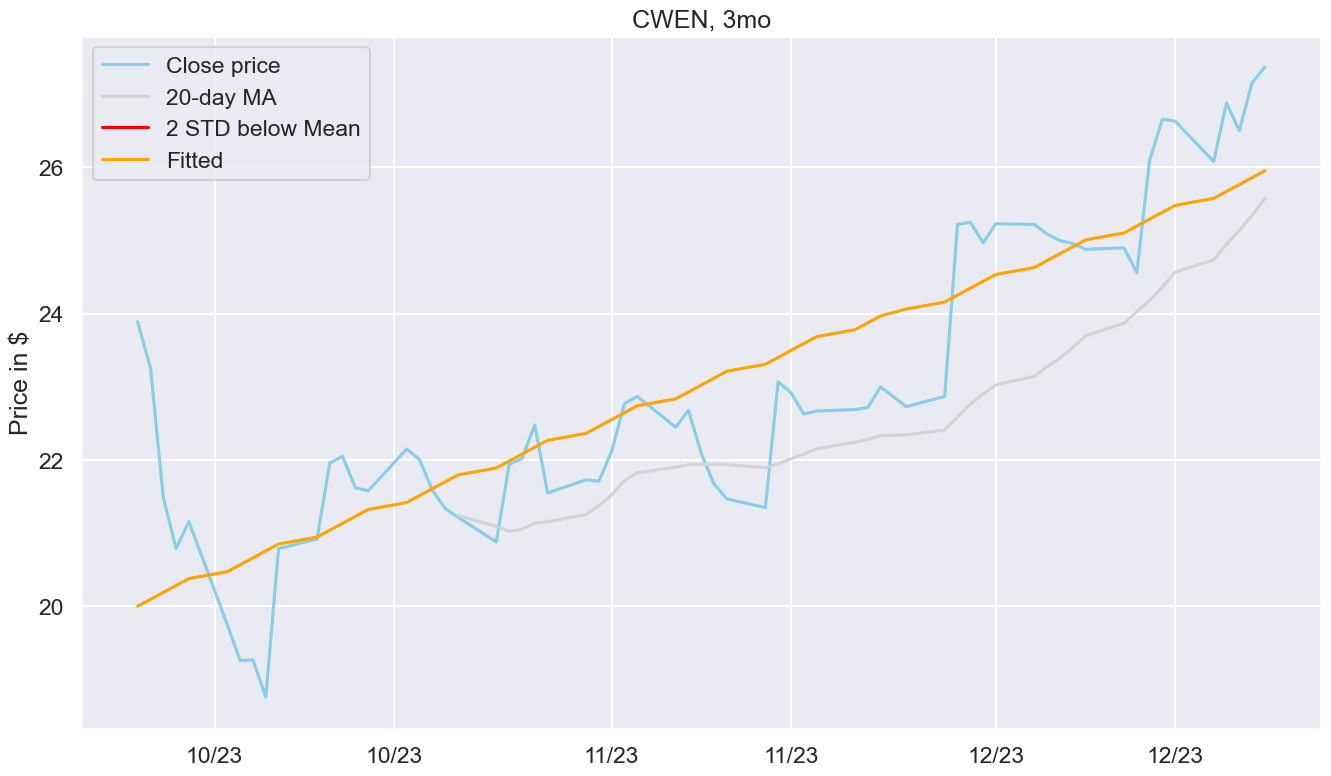

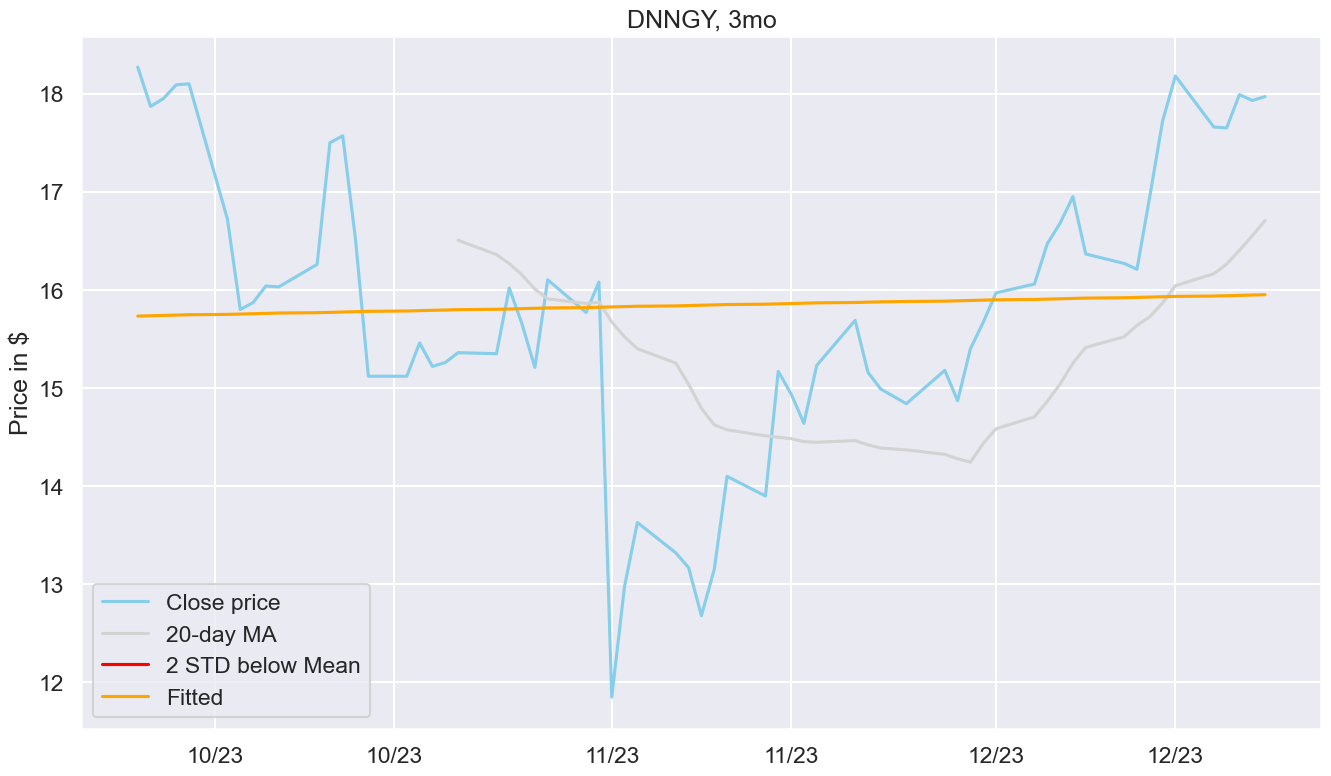

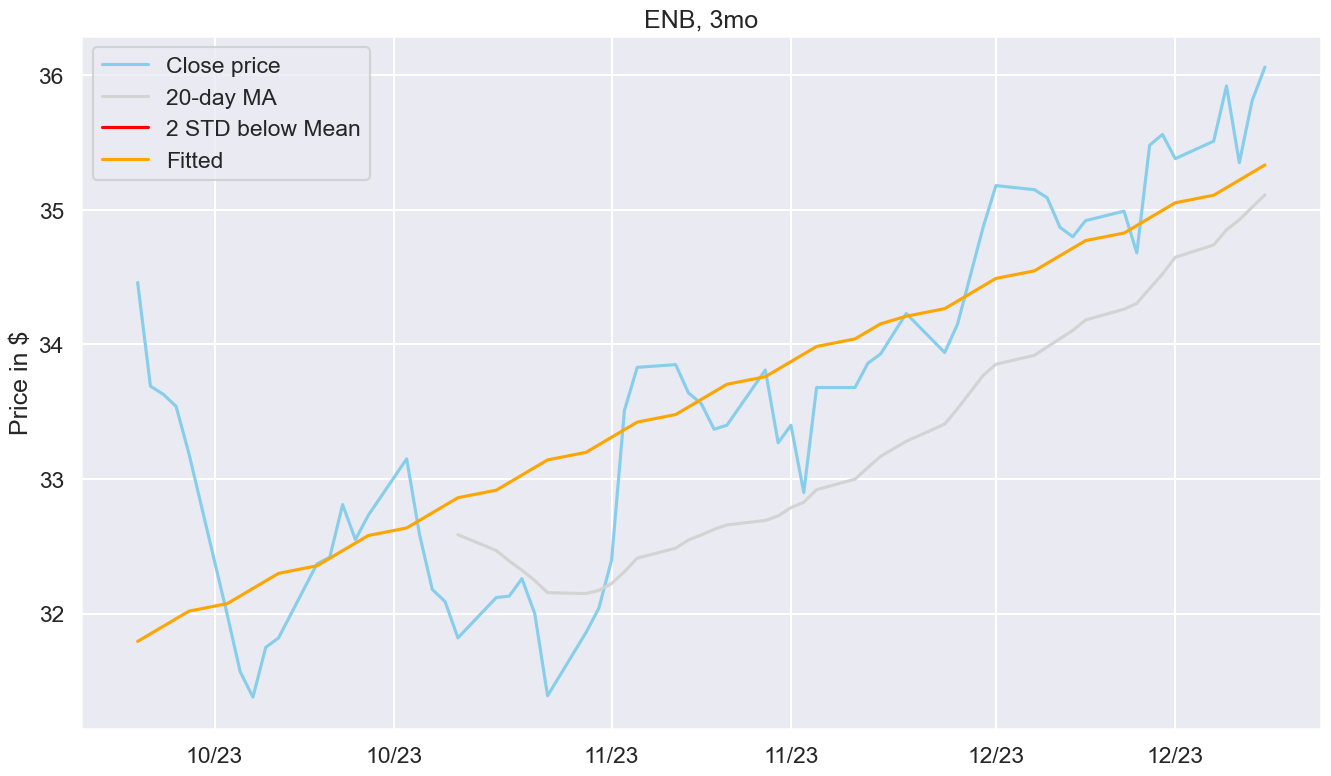

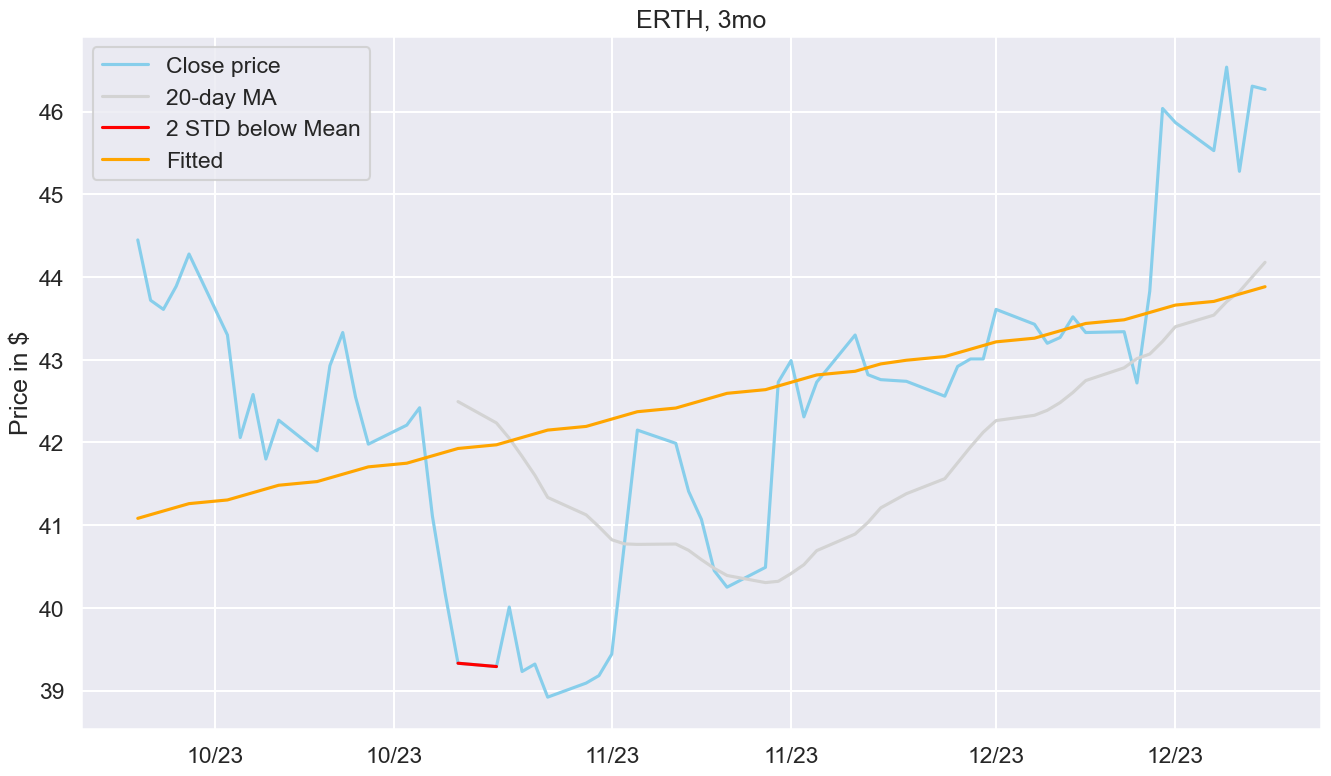

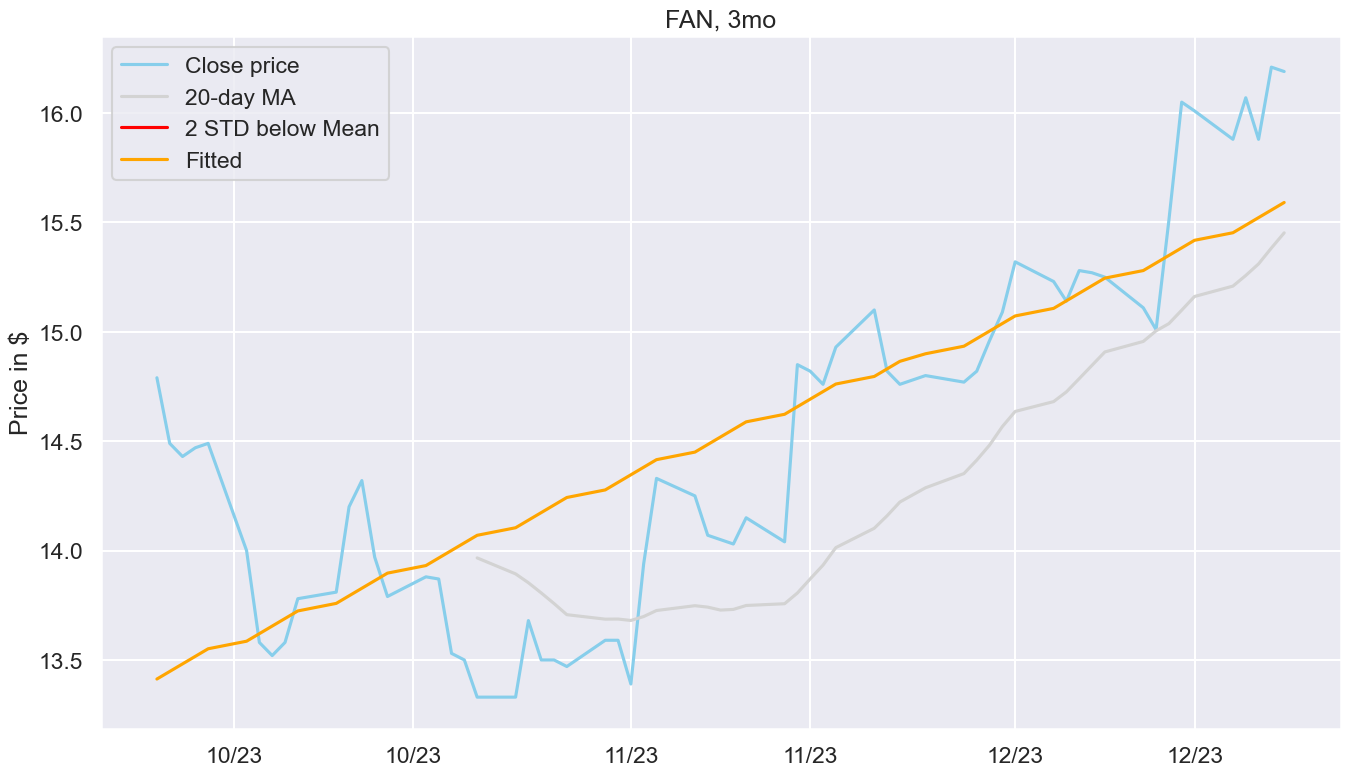

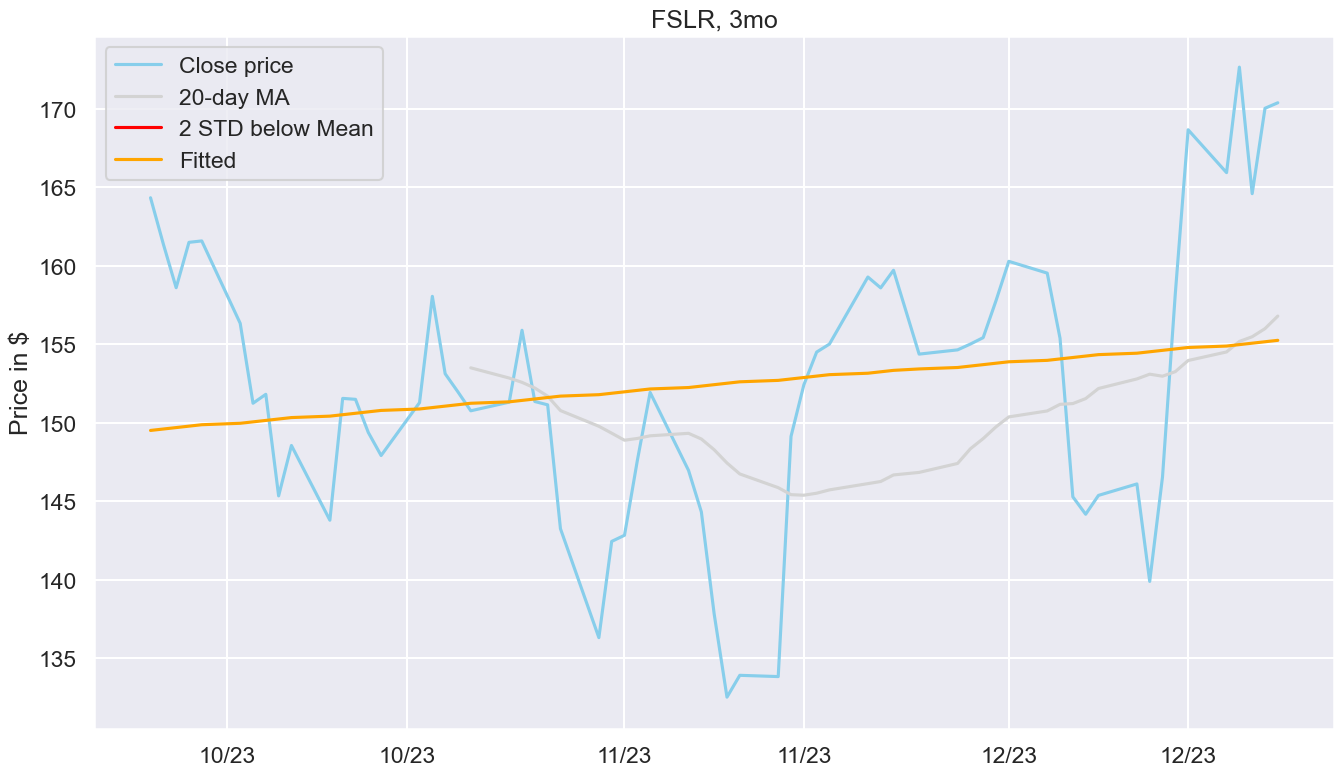

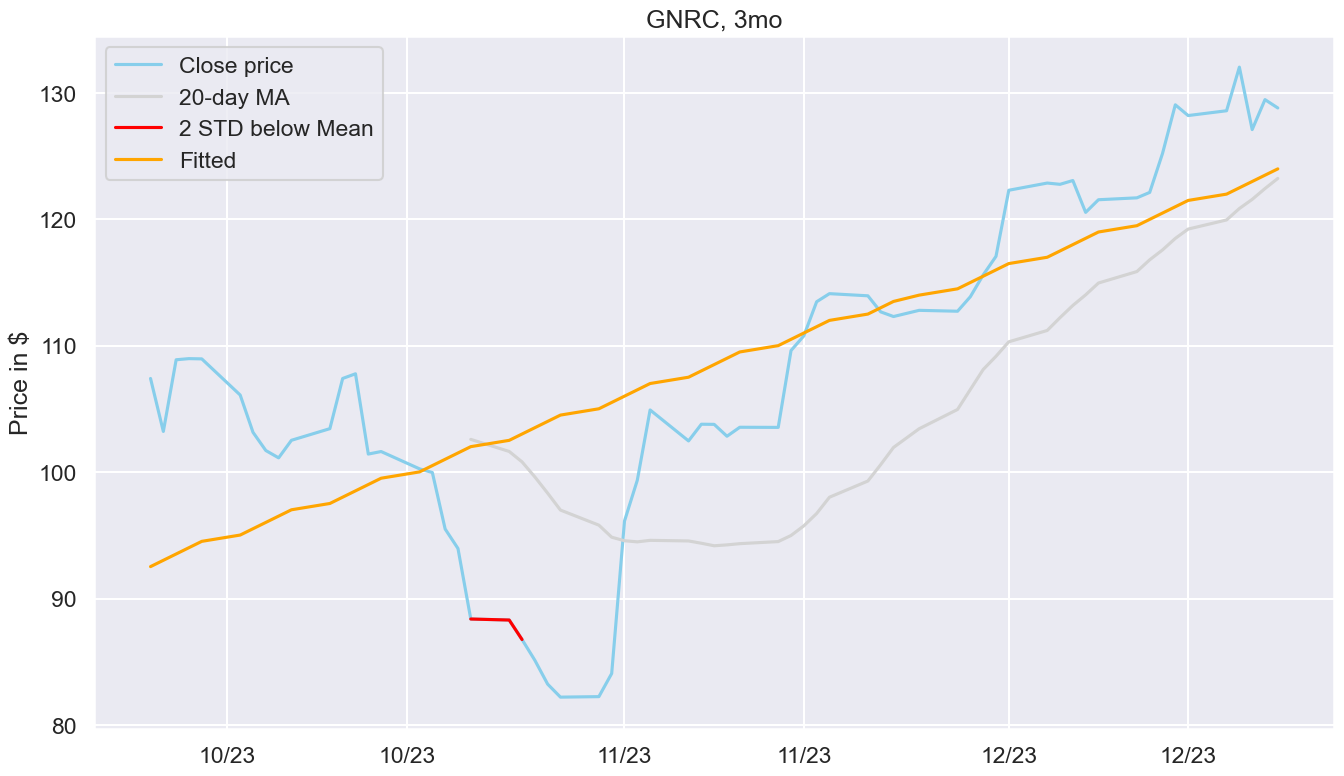

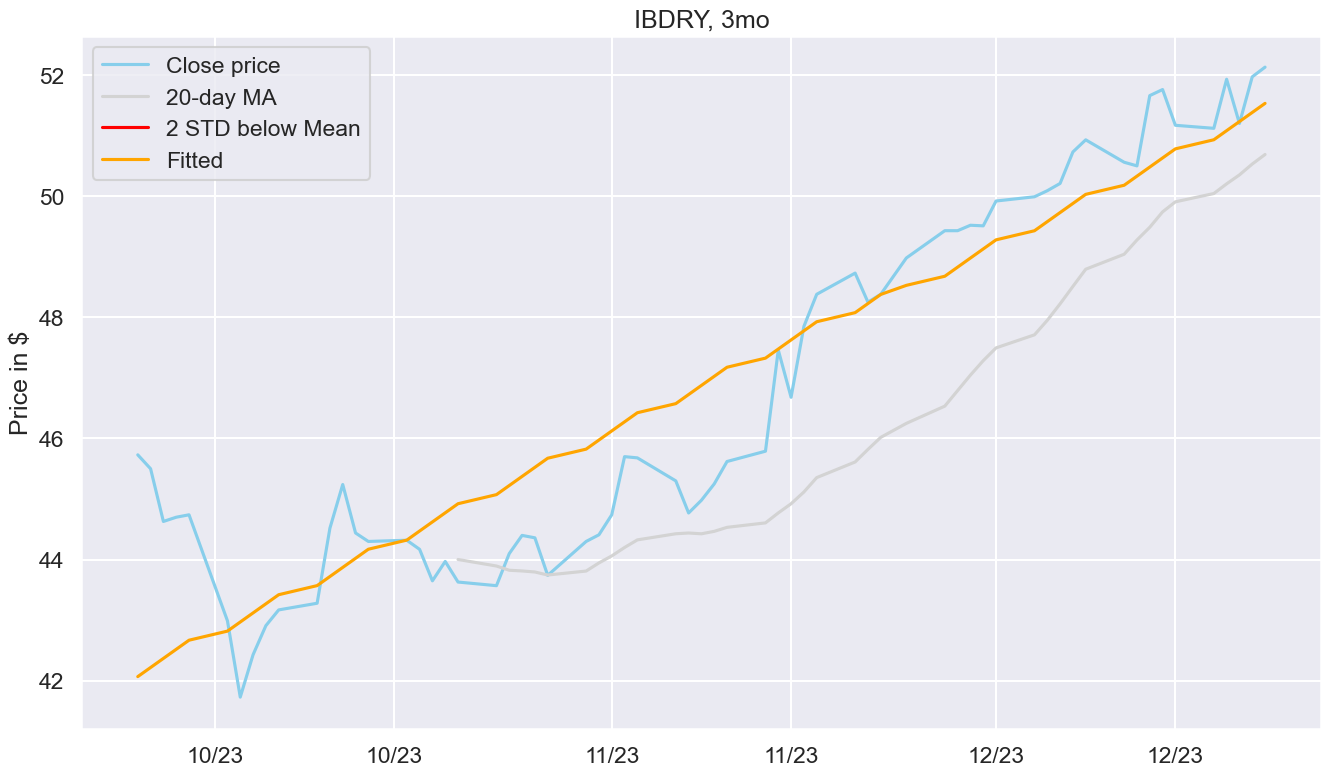

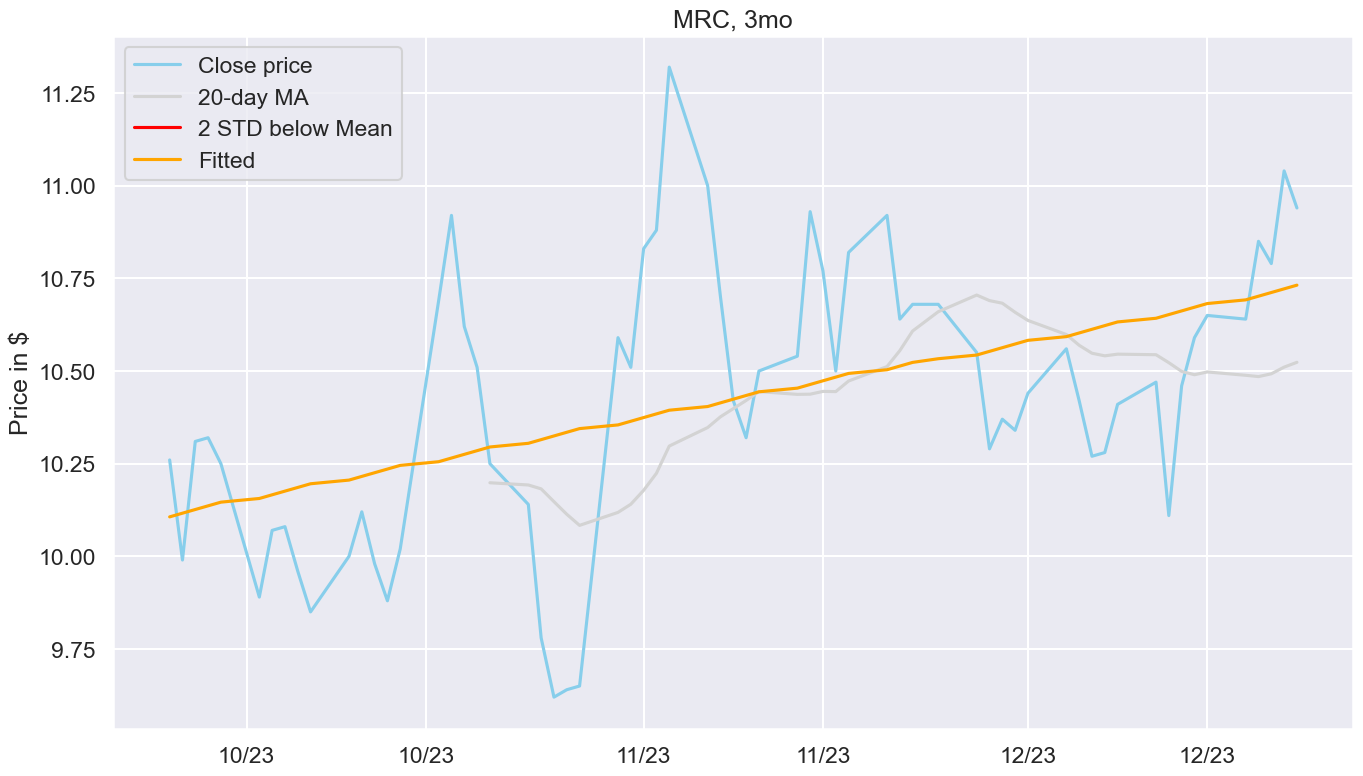

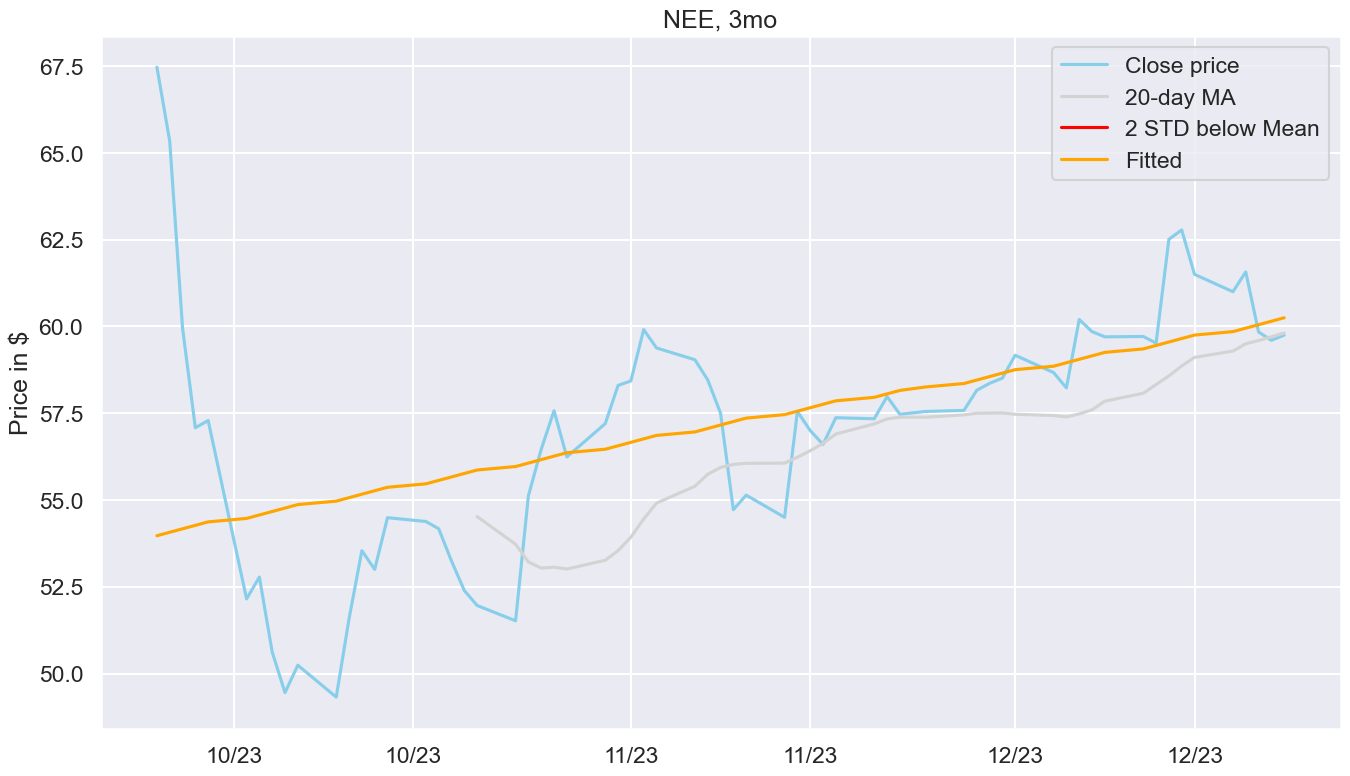

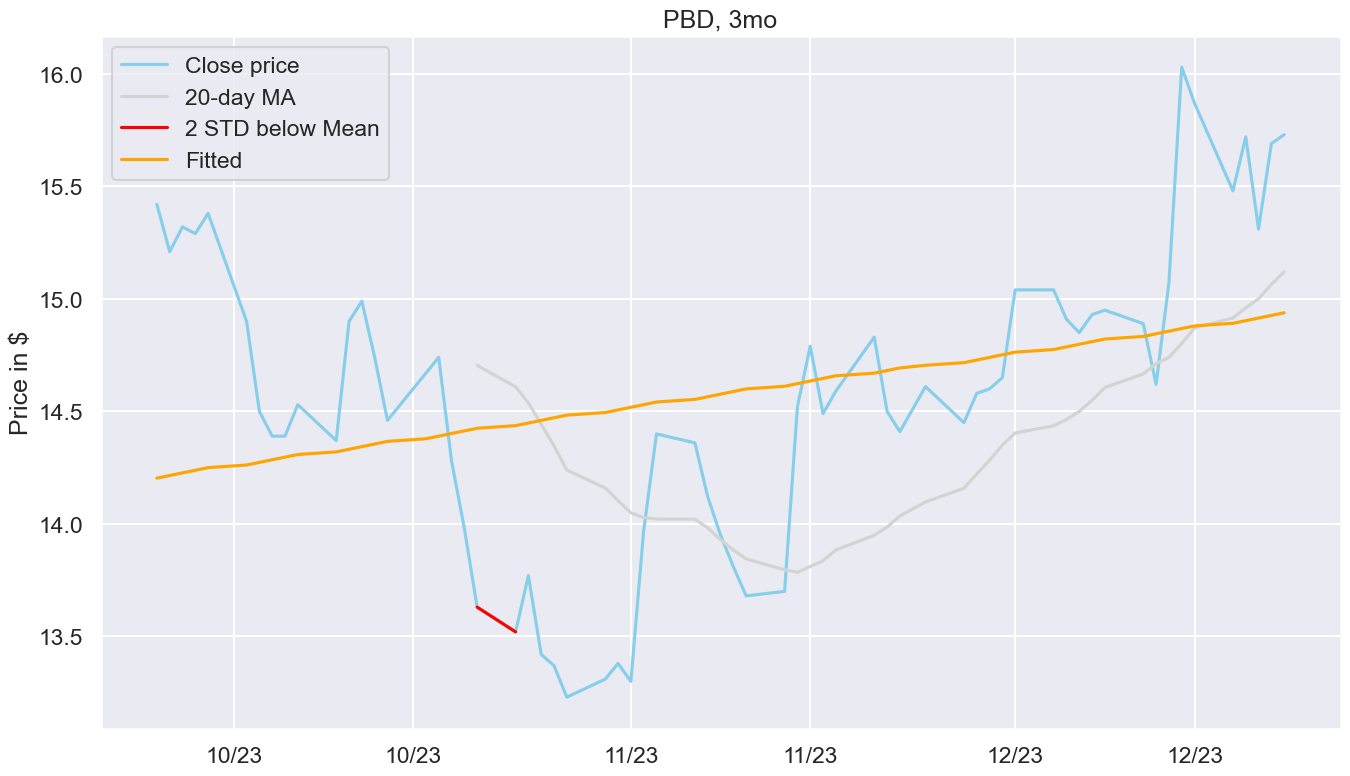

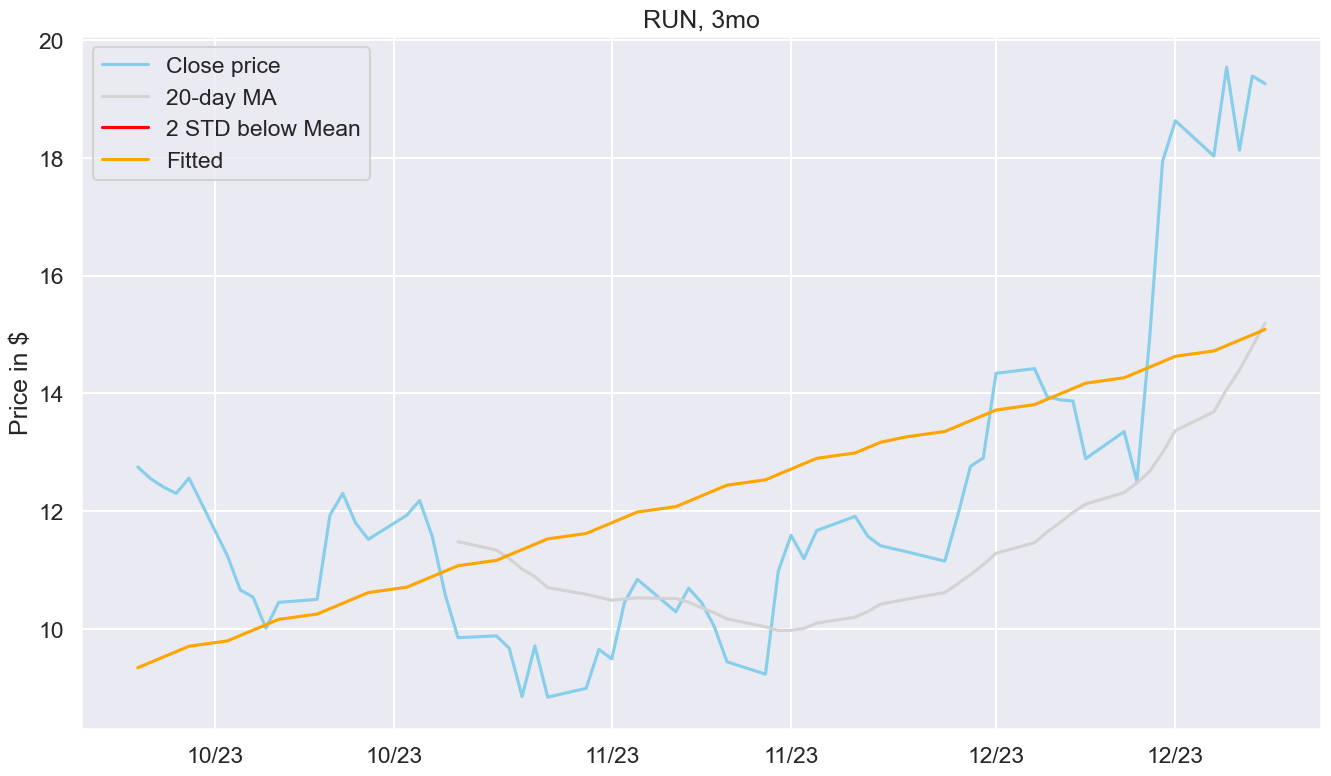

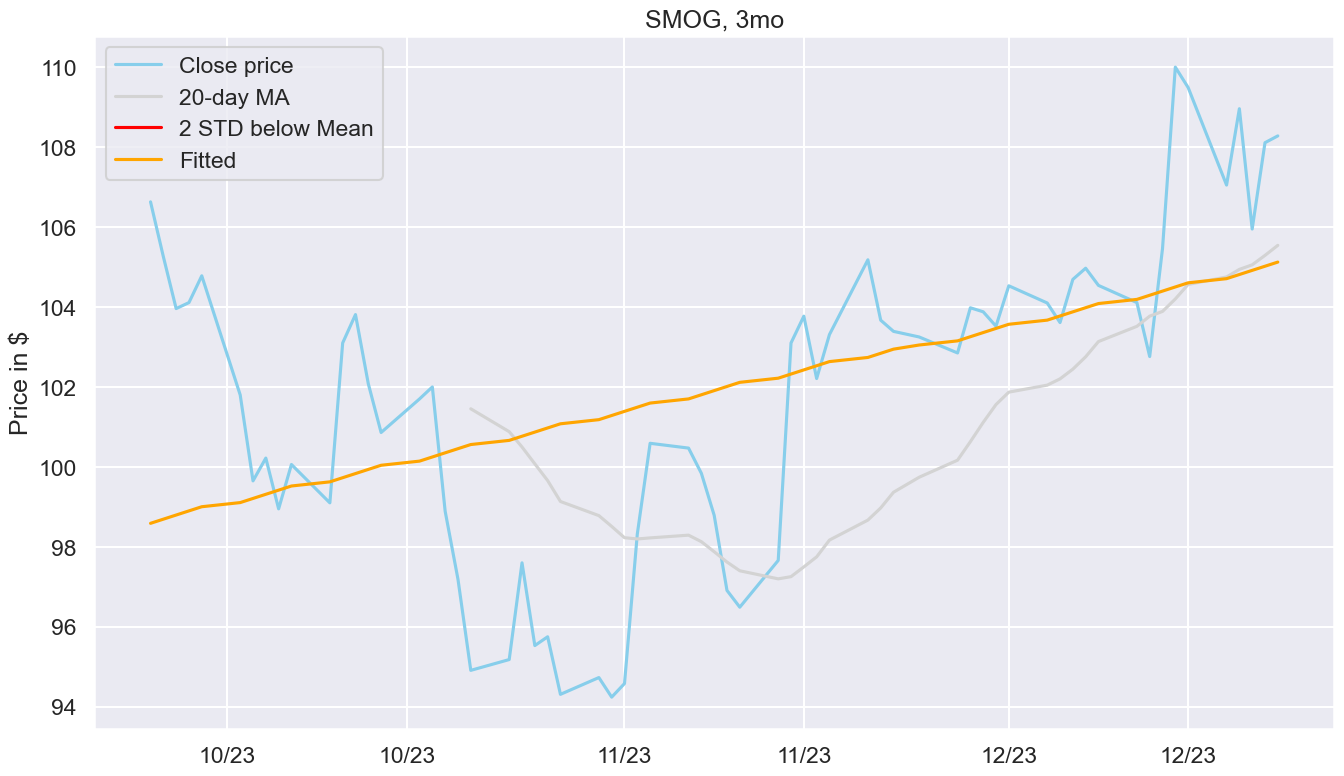

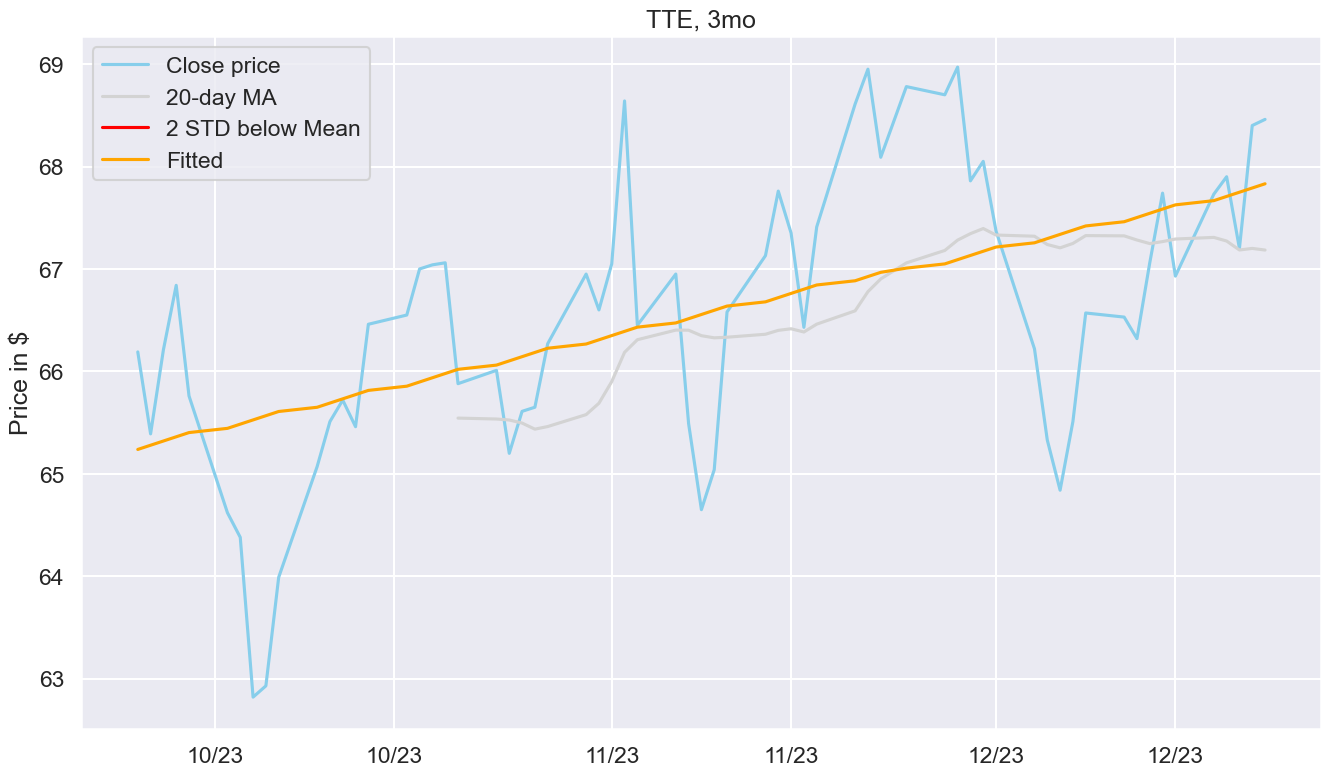

In [26]:
suitable = get_target_tickers(multi_df)
visualise_dataframes(suitable, period, ma_and_std_window)

In [27]:
info_list = get_all_earnings_info(suitable)

In [28]:
show_earnings_info(info_list)

,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
AQN,0,0m,0,0,0,0,0


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
BEP,0,0m,2,1,1,0,0


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
BEPC,0,0m,0,0,0,0,0


""


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
DNNGY,0,0m,0,0,0,0,0


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
ENB,0,0m,1,5,6,0,0


""


""


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
FSLR,0,0m,3,6,8,0,0


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
GNRC,0,0m,3,1,7,0,0


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
IBDRY,0,0m,0,0,0,0,0


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
MRC,0,0m,2,7,5,0,0


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
NEE,0,0m,5,8,2,0,0


""


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
RUN,0,0m,3,3,1,0,0


""


,,period,strongBuy,buy,hold,sell,strongSell
symbol,row,,,,,,
TTE,0,0m,0,0,0,0,0


In [16]:
now = datetime.now(tz=pytz.timezone('US/Eastern'))
current_hour = now.hour
current_minute = now.minute
current_second = now.second
current_weekday = now.weekday()
now

datetime.datetime(2023, 6, 6, 15, 7, 31, 31390, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

In [18]:
# min = 900 # 15 min
min = 5

def keep_running(dfs: dict[str, DataFrame], tickers, min):
    watchlist = []
    
    while True:
        # clear_output(wait=False)
        print("New round")
        multi_df_today = download_data(tickers, '1d', interval)
        
        for ticker, df in dfs.items():
            two_std_below_mean = df.iloc[len(df)-2]['2 STD Below Mean'].item()
            
            latest_close = multi_df_today[ticker]['Close'].item()
                
            if latest_close < two_std_below_mean and ticker not in watchlist:
                
                watchlist.append({
                    "ticker": ticker,
                    "close": latest_close
                })
                
                df.to_csv(f"new results/{ticker}.csv")
                
                playsound('sound.mp3')
        
        for item in watchlist:
            # Save this to file so we can work on it in another nb
            print(f"{item['ticker']}: {item['close']}")

        time.sleep(min)

# keep_running(multi_df, tickers, min)

New round


KeyboardInterrupt: 